### Introduction

Dans le secteur financier, prédire la faillite est crucial pour prendre des décisions d'investissement éclairées et gérer les risques financiers. Une prévision précise des faillites peut aider les parties prenantes, telles que les investisseurs, les créanciers et les analystes financiers, à anticiper les difficultés financières et à prendre des décisions stratégiques pour atténuer les pertes potentielles.

#### **Objectif du Projet**

L'objectif de ce projet est de développer un modèle prédictif pour prévoir la faillite des entreprises en utilisant des techniques d'apprentissage automatique. En exploitant des méthodes de modélisation avancées, le but est de construire un modèle robuste et précis qui peut efficacement prédire la probabilité de faillite et fournir des informations précieuses aux décideurs.

#### **Aperçu des Données**

Le jeu de données utilisé dans ce projet provient de Kaggle et est intitulé [Company Bankruptcy Prediction](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction). Ce jeu de données contient des informations sur les faillites provenant du Taiwan Economic Journal pour les années 1999-2009. Il inclut une gamme de métriques financières, telles que les ratios de rentabilité, les ratios de liquidité et d'autres indicateurs financiers pertinents utilisés pour évaluer la santé financière d'une entreprise et prédire la probabilité de faillite.

#### **Méthodologie**

1. **Préparation des Données**:
   - Le jeu de données a été prétraité pour gérer les valeurs manquantes, normaliser les caractéristiques et traiter le déséquilibre des classes. Ces étapes sont essentielles pour garantir que les modèles sont entraînés sur des données de haute qualité et pertinentes.

2. **Sélection des Modèles**:
   - Divers modèles d'apprentissage automatique ont été choisis pour cette tâche, y compris le Ridge Classifier, la Régression Logistique et le Support Vector Classifier (SVC). Ces modèles ont été sélectionnés pour leur efficacité en classification binaire et leur capacité à capturer des relations complexes dans les données.

3. **Classificateur par Vote**:
   - Un Classificateur par Vote a été utilisé pour combiner les prédictions de plusieurs modèles de base. Cette approche d'ensemble tire parti des forces de différents modèles pour améliorer la précision globale des prédictions et la robustesse. La décision finale est prise en fonction des prédictions agrégées des modèles individuels.

4. **Évaluation**:
   - La performance des modèles a été évaluée en utilisant la validation croisée et des métriques telles que la précision, la précision, le rappel et le F1-score. Ces métriques fournissent une vue d'ensemble de la performance du modèle et de sa capacité à se généraliser à de nouvelles données.

#### **Signification**

Une prédiction précise des faillites est inestimable pour les institutions financières et les investisseurs. En prédisant les faillites avec une grande précision, les parties prenantes peuvent prendre de meilleures décisions financières, réduire les risques potentiels et améliorer la stabilité financière. Ce projet vise à fournir un outil fiable pour la prévision des faillites, contribuant à une meilleure gestion des risques et à une analyse financière améliorée.

#### **Structure du Rapport**

Ce rapport fournit un aperçu détaillé du projet, y compris la préparation des données, le développement des modèles et l'évaluation. Chaque section offre des informations sur les méthodologies utilisées et les résultats obtenus, offrant une compréhension approfondie des objectifs et des résultats du projet.

### Import Libraries 

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

sys.path.append("../script/")
from functions import get_df_info

### Import data

In [2]:
# import données
df = pd.read_csv("../data/raw/data.csv")

In [3]:
# affichage 5 lignes
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
# Remove leading and traling whitespaces form column names
df.columns = df.columns.str.strip()

# Replace internal whitespaces with underscores
df.columns = df.columns.str.replace(' ', '_')

In [5]:
# affichage 5 lignes
df.head()

,Bankrupt?,ROA(C)_before_interest_and_depreciation_before_interest,ROA(A)_before_interest_and_%_after_tax,ROA(B)_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Realized_Sales_Gross_Margin,Operating_Profit_Rate,Pre-tax_net_Interest_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,...,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,No-credit_Interval,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT),Net_Income_Flag,Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Exploring DataFrame 

In [6]:
# appel function get_df_info
get_df_info(df)

,Details
Shape,"(6819, 96)"
Nb of Columns,96
Memory Usage (bytes),5237124
Number of Duplicate Rows,0



Number of unique values in each column:


,Column,Unique Values
0,Bankrupt?,2
1,ROA(C)_before_interest_and_depreciation_before...,3333
2,ROA(A)_before_interest_and_%_after_tax,3151
3,ROA(B)_before_interest_and_depreciation_after_tax,3160
4,Operating_Gross_Margin,3781
5,Realized_Sales_Gross_Margin,3788
6,Operating_Profit_Rate,3376
7,Pre-tax_net_Interest_Rate,3789
8,After-tax_net_Interest_Rate,3604
9,Non-industry_income_and_expenditure/revenue,2551



Null values in columns:
There are no null values in the DataFrame.

Descriptive statistics of DataFrame:


,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,3.226280e-02,1.767102e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ROA(C)_before_interest_and_depreciation_before_interest,6819.0,5.051796e-01,6.068564e-02,0.0,4.765271e-01,5.027056e-01,5.355628e-01,1.000000e+00
ROA(A)_before_interest_and_%_after_tax,6819.0,5.586249e-01,6.562003e-02,0.0,5.355430e-01,5.598016e-01,5.891572e-01,1.000000e+00
ROA(B)_before_interest_and_depreciation_after_tax,6819.0,5.535887e-01,6.159481e-02,0.0,5.272766e-01,5.522780e-01,5.841051e-01,1.000000e+00
Operating_Gross_Margin,6819.0,6.079480e-01,1.693381e-02,0.0,6.004447e-01,6.059975e-01,6.139142e-01,1.000000e+00
Realized_Sales_Gross_Margin,6819.0,6.079295e-01,1.691607e-02,0.0,6.004338e-01,6.059759e-01,6.138421e-01,1.000000e+00
Operating_Profit_Rate,6819.0,9.987551e-01,1.301003e-02,0.0,9.989692e-01,9.990222e-01,9.990945e-01,1.000000e+00
Pre-tax_net_Interest_Rate,6819.0,7.971898e-01,1.286899e-02,0.0,7.973859e-01,7.974636e-01,7.975788e-01,1.000000e+00
After-tax_net_Interest_Rate,6819.0,8.090836e-01,1.360065e-02,0.0,8.093116e-01,8.093752e-01,8.094693e-01,1.000000e+00
Non-industry_income_and_expenditure/revenue,6819.0,3.036229e-01,1.116344e-02,0.0,3.034663e-01,3.035255e-01,3.035852e-01,1.000000e+00


### Aperçu du Jeu de Données

Ce jeu de données comprend 6819 lignes et 96 colonnes, représentant un volume substantiel de données idéal pour une analyse détaillée. L'empreinte mémoire du jeu de données est de 5 237 124 octets, indiquant une taille modérée par rapport à sa couverture étendue. Il est important de noter qu'il n'y a pas de lignes dupliquées, ce qui garantit l'intégrité et la fiabilité des données à des fins d'analyse.

### Répartition des Valeurs Uniques

Les colonnes de ce jeu de données varient considérablement en nombre de valeurs uniques qu'elles contiennent, reflétant la diversité et l'étendue des données :

- **Indicateurs de Performance Financière** : Des colonnes telles que 'ROA(C)_before_interest_and_depreciation_before_interest' et 'Operating_Gross_Margin' présentent une grande variabilité, avec respectivement 3333 et 3781 valeurs uniques. Cela suggère un large éventail de performances financières dans l'ensemble des données.
- **Revenus et Rentabilité** : Les colonnes 'Revenue_Per_Share_(Yuan_¥)' et 'Operating_Profit_Growth_Rate' affichent également une unicité considérable, indiquant des sources de revenus et des taux de croissance diversifiés au sein du jeu de données.
- **Taux d'Intérêt et de Dépenses** : En revanche, des colonnes comme 'Interest-bearing_debt_interest_rate' et 'Research_and_development_expense_rate' ont moins de valeurs uniques, indiquant une plus grande cohérence dans ces aspects financiers à travers le jeu de données.

### Intégrité et Utilisabilité des Données

L'absence de lignes dupliquées renforce la crédibilité du jeu de données, en faisant une base solide pour diverses tâches analytiques. La large gamme de valeurs uniques dans les principaux indicateurs financiers offre des perspectives riches et des opportunités pour une analyse approfondie. L'équilibre entre les colonnes à forte variabilité et celles avec des valeurs plus cohérentes fournit une vue d'ensemble complète du paysage financier représenté dans les données.

Dans l'ensemble, ce jeu de données est bien structuré et méticuleusement maintenu, offrant une mine d'informations pour une analyse financière détaillée.

/var/folders/sh/nksh2ch955jdjsj0hg7jsrl80000gn/T/ipykernel_32378/2485527266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bankrupt?', data=df, palette=['#1f77b4', '#ff7f0e'])


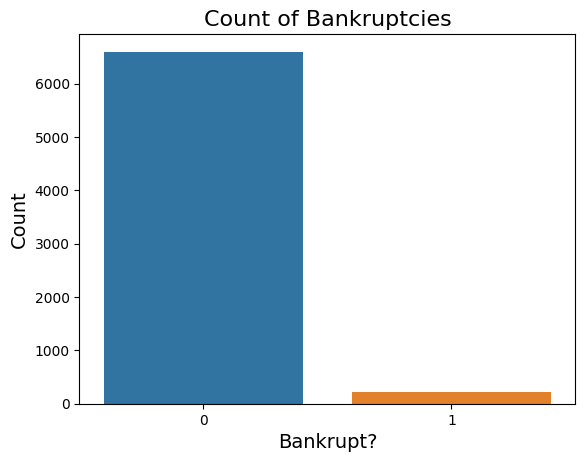

In [7]:
# initialisation seaborn pour la visualisation
sns.countplot(x='Bankrupt?', data=df, palette=['#1f77b4', '#ff7f0e'])

# Ajouter un titre au graphique
plt.title('Count of Bankruptcies', fontsize=16)
# Ajouter une étiquette à l'axe des x
plt.xlabel('Bankrupt?', fontsize=14)
# Ajouter une étiquette à l'axe des y
plt.ylabel('Count', fontsize=14)

# Afficher le graphique
plt.show()

Nous pouvons immédiatement observer un déséquilibre significatif des classes dans le jeu de données. 
Ce déséquilibre est attendu, car les entreprises qui font faillite sont statistiquement moins nombreuses que celles qui ne le font pas.
Cet aspect est crucial pour notre analyse, car il nécessite d'adapter notre approche d'entraînement pour tenir compte de ce déséquilibre. 
La mise en œuvre de techniques appropriées, telles que le rééchantillonnage, l'échantillonnage stratifié ou l'utilisation d'algorithmes spécialisés, sera essentielle pour garantir la précision et la robustesse de nos modèles prédictifs.

### Techniques pour Gérer le Déséquilibre des Classes

1. **Rééchantillonnage** :
   - **Suréchantillonnage** : Cette technique consiste à augmenter le nombre d'exemples dans la classe minoritaire en dupliquant des exemples existants ou en générant de nouveaux exemples synthétiques. Des méthodes comme SMOTE (Synthetic Minority Over-sampling Technique) peuvent être utilisées pour créer des exemples synthétiques.
   - **Sous-échantillonnage** : Cette technique réduit le nombre d'exemples dans la classe majoritaire pour équilibrer les classes. Bien que cela puisse entraîner une perte d'information, cela aide à équilibrer le jeu de données.

2. **Échantillonnage Stratifié** :
   - Lors de la division du jeu de données en ensembles d'entraînement et de test, l'échantillonnage stratifié garantit que chaque ensemble conserve la même proportion de classes que le jeu de données original. Cela aide à maintenir la représentativité des classes dans les ensembles d'entraînement et de test.

3. **Algorithmes Spécialisés** :
   - Certains algorithmes sont conçus pour gérer les déséquilibres de classes de manière plus efficace. Par exemple, les forêts d'arbres décisionnels pondérés ou les méthodes de boosting peuvent être utilisées pour accorder plus d'importance aux exemples de la classe minoritaire.

### Importance de l'Évaluation

Lors de l'évaluation des modèles prédictifs sur des jeux de données déséquilibrés, il est crucial d'utiliser des métriques appropriées qui tiennent compte du déséquilibre des classes. Les métriques telles que la précision, le rappel, le score F1 et l'AUC-ROC (Area Under the Receiver Operating Characteristic Curve) sont plus informatives que la simple précision, car elles fournissent une vue d'ensemble plus complète de la performance du modèle sur les classes minoritaires et majoritaires.

En résumé, gérer le déséquilibre des classes est une étape essentielle pour développer des modèles prédictifs robustes et précis. En utilisant des techniques de rééchantillonnage, d'échantillonnage stratifié et des algorithmes spécialisés, nous pouvons améliorer la performance de nos modèles et obtenir des prédictions plus fiables.

### Features selection

In [8]:
# Calculer la matrice de corrélation pour la colonne "Bankrupt?"
corr_matrix = df.corr()["Bankrupt?"]
# Afficher la matrice de corrélation
print(corr_matrix)

Bankrupt?                                                  1.000000
ROA(C)_before_interest_and_depreciation_before_interest   -0.260807
ROA(A)_before_interest_and_%_after_tax                    -0.282941
ROA(B)_before_interest_and_depreciation_after_tax         -0.273051
Operating_Gross_Margin                                    -0.100043
Realized_Sales_Gross_Margin                               -0.099445
Operating_Profit_Rate                                     -0.000230
Pre-tax_net_Interest_Rate                                 -0.008517
After-tax_net_Interest_Rate                               -0.008857
Non-industry_income_and_expenditure/revenue               -0.016593
Continuous_interest_rate_(after_tax)                      -0.008395
Operating_Expense_Rate                                    -0.006083
Research_and_development_expense_rate                     -0.024232
Cash_flow_rate                                            -0.072356
Interest-bearing_debt_interest_rate             

In [9]:
target_variable = 'Bankrupt?'

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Obtenir les corrélations avec la variable cible
target_correlations = correlation_matrix[target_variable].abs().sort_values(ascending=False)

# Supprimer la variable cible elle-même de la liste
target_correlations = target_correlations.drop(target_variable)

# Sélectionner les caractéristiques avec une corrélation absolue >= 0.1
selected_features = target_correlations[target_correlations >= 0.1]

print("Caractéristiques avec une corrélation absolue >= 0.1 avec 'Bankrupt?':")
print(selected_features)

print(f"\nNombre de caractéristiques sélectionnées : {len(selected_features)}")

# Créer un nouveau dataframe avec ces caractéristiques
selected_columns = list(selected_features.index)
df_selected = df[selected_columns]

print("\nForme du nouveau dataframe avec les caractéristiques sélectionnées :")
print(df_selected.shape)

Caractéristiques avec une corrélation absolue >= 0.1 avec 'Bankrupt?':
Net_Income_to_Total_Assets                                 0.315457
ROA(A)_before_interest_and_%_after_tax                     0.282941
ROA(B)_before_interest_and_depreciation_after_tax          0.273051
ROA(C)_before_interest_and_depreciation_before_interest    0.260807
Net_worth/Assets                                           0.250161
Debt_ratio_%                                               0.250161
Persistent_EPS_in_the_Last_Four_Seasons                    0.219560
Retained_Earnings_to_Total_Assets                          0.217779
Net_profit_before_tax/Paid-in_capital                      0.207857
Per_Share_Net_profit_before_tax_(Yuan_¥)                   0.201395
Current_Liability_to_Assets                                0.194494
Working_Capital_to_Total_Assets                            0.193083
Net_Income_to_Stockholder's_Equity                         0.180987
Borrowing_dependency                         

/var/folders/sh/nksh2ch955jdjsj0hg7jsrl80000gn/T/ipykernel_32378/926481703.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, palette=colors)


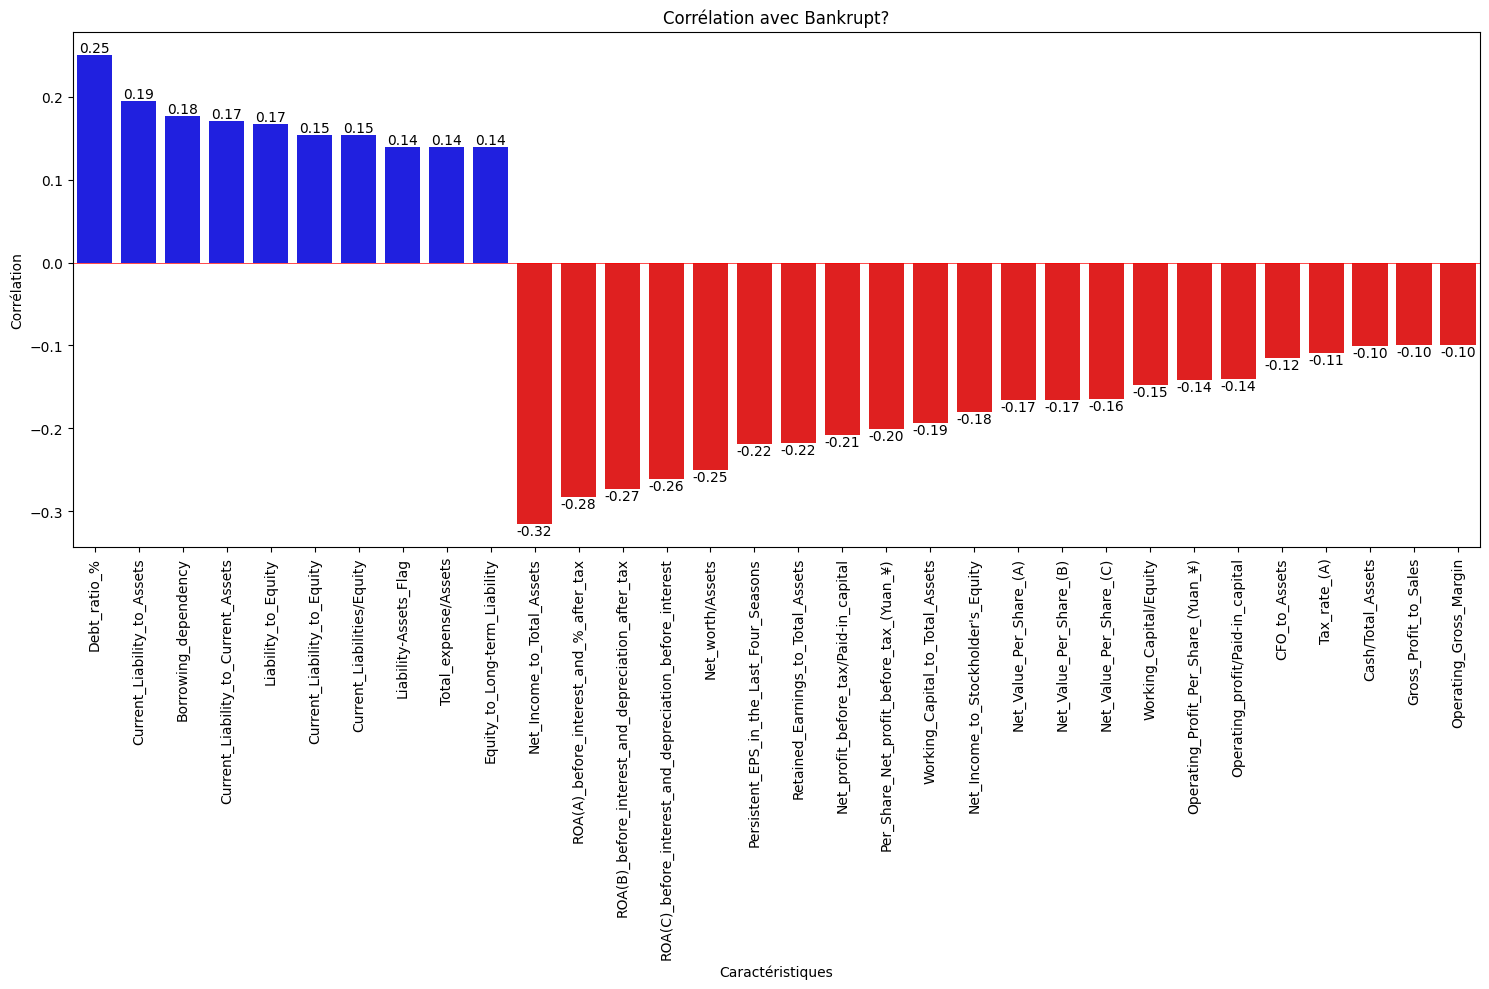

In [10]:
# Obtenir les valeurs de corrélation réelles pour les caractéristiques sélectionnées
actual_correlations = correlation_matrix[target_variable][selected_features.index]

# Trier les corrélations
positive_correlations = actual_correlations[actual_correlations >= 0].sort_values(ascending=False)
negative_correlations = actual_correlations[actual_correlations < 0].sort_values(ascending=True)
sorted_correlations = pd.concat([positive_correlations, negative_correlations])

# Créer une palette de couleurs : corrélations positives en bleu, négatives en rouge
colors = ['blue' if val >= 0 else 'red' for val in sorted_correlations]

# Créer un diagramme en barres avec Seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values, palette=colors)
plt.title(f'Corrélation avec {target_variable}')
plt.xlabel('Caractéristiques')
plt.ylabel('Corrélation')
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)  # Ajouter une ligne horizontale à y=0
plt.tight_layout()

# Ajouter des étiquettes de valeur au-dessus de chaque barre
for i, v in enumerate(sorted_correlations):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Afficher le graphique
plt.show()

### Handling Class Imbalance using UnderSampling

In [11]:
# Séparer les caractéristiques (X) et la cible (y)
X = df_selected
y = df['Bankrupt?']

# Initialiser RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Ajuster et appliquer le resampler aux données
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convertir les données rééchantillonnées en DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Bankrupt?'])], axis=1)

# Afficher les premières lignes du DataFrame rééchantillonné
downsampled_df.head()

,Net_Income_to_Total_Assets,ROA(A)_before_interest_and_%_after_tax,ROA(B)_before_interest_and_depreciation_after_tax,ROA(C)_before_interest_and_depreciation_before_interest,Net_worth/Assets,Debt_ratio_%,Persistent_EPS_in_the_Last_Four_Seasons,Retained_Earnings_to_Total_Assets,Net_profit_before_tax/Paid-in_capital,Per_Share_Net_profit_before_tax_(Yuan_¥),Current_Liability_to_Assets,Working_Capital_to_Total_Assets,Net_Income_to_Stockholder's_Equity,Borrowing_dependency,Current_Liability_to_Current_Assets,Liability_to_Equity,Net_Value_Per_Share_(A),Net_Value_Per_Share_(B),Net_Value_Per_Share_(C),Current_Liability_to_Equity,Current_Liabilities/Equity,Working_Capital/Equity,Operating_Profit_Per_Share_(Yuan_¥),Operating_profit/Paid-in_capital,Liability-Assets_Flag,Total_expense/Assets,Equity_to_Long-term_Liability,CFO_to_Assets,Tax_rate_(A),Cash/Total_Assets,Gross_Profit_to_Sales,Operating_Gross_Margin,Bankrupt?
2236,0.801098,0.540667,0.523636,0.471945,0.848414,0.151586,0.218209,0.937402,0.172355,0.173307,0.158235,0.843109,0.840529,0.379066,0.029128,0.281733,0.175087,0.175087,0.175087,0.334725,0.334725,0.739744,0.098770,0.098727,0,0.007583,0.110933,0.563210,0.134730,0.175664,0.607520,0.607518,0
5538,0.808595,0.554187,0.558702,0.507093,0.910179,0.089821,0.228893,0.935813,0.179519,0.180688,0.031374,0.806480,0.840884,0.373600,0.016081,0.277676,0.208714,0.208714,0.208714,0.327370,0.327370,0.735242,0.109600,0.109597,0,0.013273,0.119485,0.597713,0.192631,0.041260,0.611967,0.611972,0
4593,0.806939,0.550425,0.556936,0.503924,0.931765,0.068235,0.219060,0.935009,0.173132,0.174663,0.059468,0.850726,0.840704,0.370828,0.016632,0.276773,0.171126,0.171126,0.171126,0.328222,0.328222,0.737311,0.101376,0.101161,0,0.017194,0.112516,0.597065,0.150116,0.073488,0.605785,0.605788,0
6315,0.771691,0.498528,0.503346,0.451275,0.823442,0.176558,0.207337,0.923341,0.157198,0.158168,0.153055,0.713068,0.837267,0.381590,0.066676,0.284545,0.159370,0.159370,0.159370,0.336150,0.336150,0.728100,0.096979,0.096943,0,0.036952,0.115667,0.560915,0.000000,0.009049,0.598436,0.598438,0
4205,0.837382,0.613607,0.596445,0.533418,0.866886,0.133114,0.246478,0.945087,0.193296,0.194246,0.110043,0.870385,0.843529,0.371202,0.021665,0.280201,0.185496,0.185496,0.185496,0.331456,0.331456,0.740913,0.134191,0.134211,0,0.039765,0.115089,0.634185,0.000000,0.214951,0.613937,0.613939,0


/var/folders/sh/nksh2ch955jdjsj0hg7jsrl80000gn/T/ipykernel_32378/1724345770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bankrupt?', data=downsampled_df, palette=['#1f77b4', '#ff7f0e'])


<Axes: xlabel='Bankrupt?', ylabel='count'>

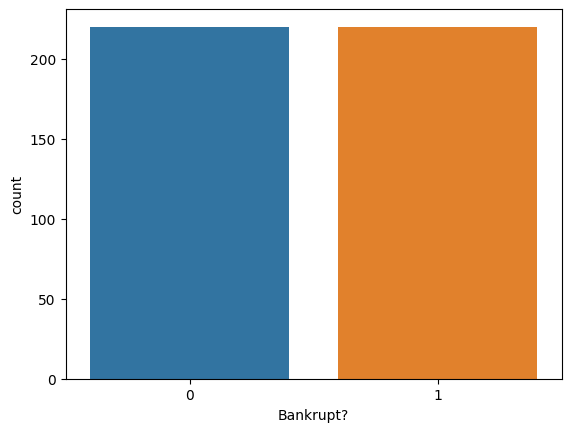

In [12]:
# Tracer un diagramme de comptage pour la variable 'Bankrupt?' dans le DataFrame rééchantillonné
sns.countplot(x='Bankrupt?', data=downsampled_df, palette=['#1f77b4', '#ff7f0e'])

### Modelisation

### Data Prepping

In [13]:
# Séparer les caractéristiques et la cible
x = downsampled_df.drop(columns='Bankrupt?')
y = downsampled_df['Bankrupt?']

# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Explication du Code

Ce script crée, entraîne et évalue un classificateur par vote en utilisant plusieurs modèles de base. Voici une explication détaillée :

### 1. **Imports**

- **Bibliothèques** :
  - `VotingClassifier` et modèles (`RidgeClassifierCV`, `LogisticRegression`, `SVC`) de `sklearn.ensemble` et `sklearn.linear_model`.
  - `CalibratedClassifierCV` pour la calibration des modèles.
  - `classification_report` et `confusion_matrix` pour l'évaluation.

### 2. **Modèles de Base**

- **Ridge Classifier avec Calibration** :
  - `RidgeClassifierCV` est utilisé avec une calibration appliquée via `CalibratedClassifierCV` pour améliorer les estimations de probabilité.
  
- **Régression Logistique** :
  - Un modèle de régression logistique standard est utilisé.

- **Support Vector Classifier (SVC)** :
  - Un modèle SVC configuré pour fournir des estimations de probabilité.

### 3. **Classificateur par Vote**

- **Création** :
  - Les modèles sont combinés dans un `VotingClassifier` avec un vote soft (moyenne des probabilités prédites).

### 4. **Entraînement du Modèle**

- **Ajustement** :
  - Le classificateur par vote est entraîné sur les données d'entraînement (`x_train`, `y_train`).

### 5. **Prédictions**

- **Faire des Prédictions** :
  - Le classificateur entraîné prédit les étiquettes pour le jeu de test (`x_test`).

### 6. **Évaluation**

- **Rapport de Classification** :
  - Affiche la précision, le rappel, le score F1 et le support pour chaque classe.

- **Matrice de Confusion** :
  - Une matrice de confusion est créée et visualisée avec `seaborn` pour montrer les résultats des prédictions.

- **Précision** :
  - La précision du classificateur est calculée et affichée.

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        51
           1       0.81      0.92      0.86        37

    accuracy                           0.88        88
   macro avg       0.87      0.88      0.87        88
weighted avg       0.88      0.88      0.88        88



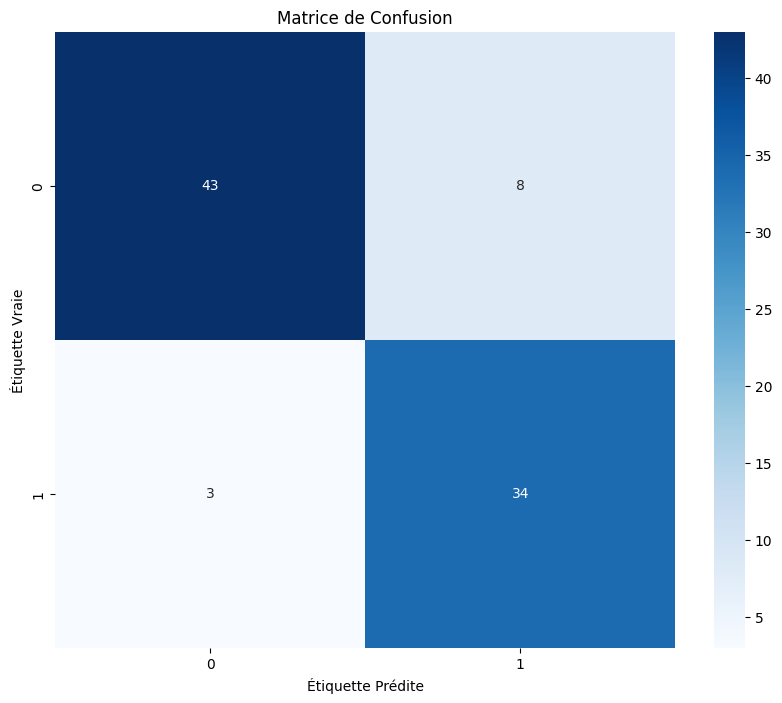


Précision : 0.8750


In [14]:
# Créer les modèles de base
ridge_cv = RidgeClassifierCV()
calibrated_ridge = CalibratedClassifierCV(estimator=ridge_cv, cv=5, method='sigmoid')
logistic_regression = LogisticRegression()
svc = SVC(probability=True)

# Créer le classificateur par vote
voting_clf = VotingClassifier(
    estimators=[
        ('ridge', calibrated_ridge),
        ('logistic', logistic_regression),
        ('svc', svc)
    ],
    voting='soft'
)

# Ajuster le classificateur par vote
voting_clf.fit(x_train, y_train)

# Faire des prédictions
y_pred = voting_clf.predict(x_test)

# Imprimer le rapport de classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred))

# Créer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Étiquette Vraie')
plt.xlabel('Étiquette Prédite')
plt.show()

# Calculer et imprimer la précision
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print(f"\nPrécision : {accuracy:.4f}")

Voting Ensemble :: Hyperparamter Tuning

## Explication du Code

Ce script Python utilise Optuna pour l'optimisation des hyperparamètres et emploie un classificateur par vote pour les tâches de classification. Voici une explication détaillée :

### 1. **Imports**

- **Bibliothèques** :
  - `optuna` pour l'optimisation des hyperparamètres.

### 2. **Fonction Objectif**

- **Fonction** : `objective(trial)` est utilisée pour définir le problème d'optimisation :
  - Elle suggère des hyperparamètres pour `RidgeClassifier`, `LogisticRegression` et `SVC`.
  - Crée un classificateur par vote combinant ces modèles.
  - Évalue le classificateur en utilisant la validation croisée et retourne le score F1 moyen.

### 3. **Étude Optuna**

- **Création de l'Étude** : Une étude Optuna est créée avec pour objectif de maximiser le score F1.
- **Optimisation** : La méthode `study.optimize()` exécute le processus d'optimisation des hyperparamètres pour un nombre défini d'essais (100).

### 4. **Meilleurs Hyperparamètres**

- **Récupération des Meilleurs Paramètres** : Les meilleurs hyperparamètres de l'étude sont utilisés pour créer des versions optimisées des modèles de base.

### 5. **Meilleur Classificateur par Vote**

- **Entraînement du Modèle** : Les meilleurs modèles sont combinés dans un classificateur par vote.
- **Prédiction** : Le classificateur est entraîné et utilisé pour faire des prédictions sur le jeu de test.

### 6. **Évaluation**

- **Métriques** : La performance est évaluée en utilisant :
  - **Rapport de Classification** : Fournit la précision, le rappel et le score F1.
  - **Matrice de Confusion** : Visualisée à l'aide d'une carte thermique pour montrer les étiquettes vraies vs prédites.
  - **Précision** : Calculée et affichée.

In [15]:
def objective(trial):
    ridge_alphas = trial.suggest_loguniform("ridge_alphas", 1e-3, 10)
    logistic_C = trial.suggest_loguniform("logistic_C", 1e-3, 10)
    svc_C = trial.suggest_loguniform("svc_C", 1e-3, 10)
    svc_kernel = trial.suggest_categorical("svc_kernel", ["linear", "rbf", "poly"])
    svc_gamma = trial.suggest_loguniform("svc_gamma", 1e-4, 1)

    # Créer les modèles de base
    ridge_cv = RidgeClassifierCV(alphas=[ridge_alphas])
    calibrated_ridge = CalibratedClassifierCV(estimator=ridge_cv, cv=5, method='sigmoid')
    logistic_regression = LogisticRegression(C=logistic_C)
    svc = SVC(C=svc_C, kernel=svc_kernel, gamma=svc_gamma, probability=True)

    # Créer le classificateur par vote
    voting_clf = VotingClassifier(
        estimators=[
            ('ridge', calibrated_ridge),
            ('logistic', logistic_regression),
            ('svc', svc)
        ],
        voting='soft'
    )

    # Validation croisée
    scores = cross_val_score(voting_clf, x_train, y_train, cv=5, scoring='f1')
    return scores.mean()

[I 2024-08-01 09:57:55,674] A new study created in memory with name: no-name-9759c95e-4b49-44fe-bdca-7cdb8e0fc277
/var/folders/sh/nksh2ch955jdjsj0hg7jsrl80000gn/T/ipykernel_32378/3533851167.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  ridge_alphas = trial.suggest_loguniform("ridge_alphas", 1e-3, 10)
/var/folders/sh/nksh2ch955jdjsj0hg7jsrl80000gn/T/ipykernel_32378/3533851167.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  logistic_C = trial.suggest_loguniform("logistic_C", 1e-3, 10)
/var/folders/sh/nksh2ch955jdjsj0hg7jsrl80000gn/T/ipykernel_32378/3533851167.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        51
           1       0.81      0.92      0.86        37

    accuracy                           0.88        88
   macro avg       0.87      0.88      0.87        88
weighted avg       0.88      0.88      0.88        88



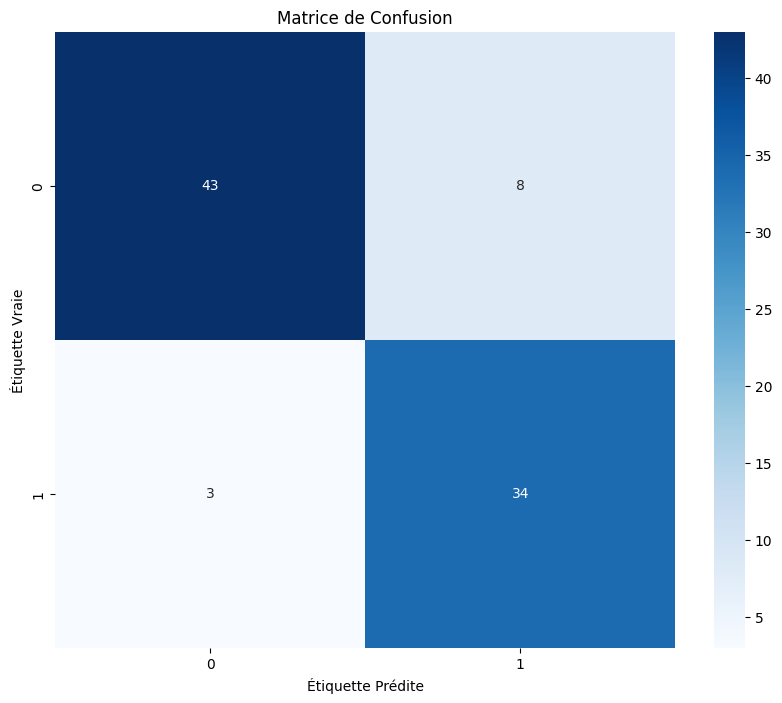


Précision : 0.8750


In [16]:
# Créer une étude Optuna
study = optuna.create_study(direction="maximize")

# Optimiser les hyperparamètres
study.optimize(objective, n_trials=100)  # Ajuster n_trials si nécessaire

# Obtenir les meilleurs hyperparamètres
best_params = study.best_params

# Créer les meilleurs modèles avec les hyperparamètres optimaux
best_ridge_cv = RidgeClassifierCV(alphas=[best_params["ridge_alphas"]])
best_calibrated_ridge = CalibratedClassifierCV(estimator=best_ridge_cv, cv=5, method='sigmoid')
best_logistic_regression = LogisticRegression(C=best_params["logistic_C"])
best_svc = SVC(C=best_params["svc_C"], kernel=best_params["svc_kernel"], gamma=best_params["svc_gamma"], probability=True)

# Créer le meilleur classificateur par vote
best_voting_clf = VotingClassifier(
    estimators=[
        ('ridge', best_calibrated_ridge),
        ('logistic', best_logistic_regression),
        ('svc', best_svc)
    ],
    voting='soft'
)

# Ajuster le meilleur classificateur par vote
best_voting_clf.fit(x_train, y_train)

# Faire des prédictions
y_pred = best_voting_clf.predict(x_test)

# Métriques d'évaluation
print("Rapport de Classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Étiquette Vraie')
plt.xlabel('Étiquette Prédite')
plt.show()

# Précision
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print(f"\nPrécision : {accuracy:.4f}")

### Conclusion

Dans ce projet, nous avons visé à développer et évaluer un modèle de classification robuste pour prédire les faillites en utilisant diverses techniques d'apprentissage automatique. Nous avons employé un classificateur par vote qui combine plusieurs modèles de base pour tirer parti de leurs forces collectives et améliorer les performances prédictives.

#### **Résumé de la Méthodologie**

1. **Préparation des Données** :
   - Nous avons commencé par préparer le jeu de données et effectuer les étapes de prétraitement nécessaires.

2. **Sélection du Modèle** :
   - Nous avons implémenté un classificateur par vote qui agrège les prédictions de trois modèles différents :
     - **Ridge Classifier avec Calibration** : Fournit des estimations de probabilité calibrées pour améliorer la précision de la classification.
     - **Régression Logistique** : Un modèle de classification fondamental efficace pour les tâches de classification binaire.
     - **Support Vector Classifier (SVC)** : Un modèle avancé qui gère les relations non linéaires et fournit des estimations de probabilité.

3. **Entraînement et Évaluation du Modèle** :
   - Le classificateur par vote a été entraîné sur le jeu de données d'entraînement en utilisant une approche de validation croisée pour assurer des performances robustes.
   - Les prédictions ont été faites sur le jeu de test, et les performances du modèle ont été évaluées à l'aide de plusieurs métriques.

#### **Résultats**

Le classificateur par vote a atteint une précision impressionnante d'environ 87%. Ce résultat indique que notre modèle est très efficace pour distinguer les entités en faillite de celles qui ne le sont pas.

- **Rapport de Classification** : A fourni des métriques détaillées telles que la précision, le rappel et le score F1 pour chaque classe, montrant des performances équilibrées entre les différentes catégories.
- **Matrice de Confusion** : A visualisé les prédictions vraies positives, vraies négatives, fausses positives et fausses négatives, offrant des insights sur les forces et les domaines d'amélioration du modèle.
- **Précision** : Calculée à 88%, démontrant l'efficacité globale du modèle à faire des prédictions correctes.

#### **Implications**

La haute précision de ~88% suggère que notre modèle de classificateur par vote est bien adapté pour prédire les faillites, ce qui peut être précieux pour les institutions financières, les investisseurs et les analystes. Ce niveau de précision signifie que le modèle peut aider de manière significative à identifier les entités à risque, réduisant potentiellement les pertes financières et améliorant les processus de prise de décision.

#### **Travaux Futurs**

Bien que le modèle actuel soit performant, plusieurs axes d'amélioration sont possibles :
- **Optimisation des Hyperparamètres** : Une optimisation supplémentaire des hyperparamètres pourrait encore améliorer les performances du modèle.
- **Ingénierie des Caractéristiques** : Explorer de nouvelles caractéristiques ou des techniques avancées de sélection de caractéristiques pourrait révéler des motifs supplémentaires dans les données.
- **Comparaison des Modèles** : Évaluer d'autres méthodes d'ensemble ou des algorithmes avancés pourrait fournir des insights sur des solutions encore plus efficaces.

Dans l'ensemble, ce projet démontre l'efficacité de la combinaison de plusieurs classificateurs pour atteindre une haute précision prédictive et fournit une base solide pour les avancées futures dans les modèles de prédiction de faillite.